<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tutorial 1: *Dimensionality Reduction (IRIS dataset)***

</center>

### **Ketentuan:**

1.	Dokumen template tutorial dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe.
2.	Tutorial ini dirancang agar mahasiswa dapat menggunakan library yang akan digunakan dalam pengerjaan lab dan tugas yang akan datang.
3.	Tidak ada submisi dalam pelaksanaan tutorial. Silakan berdiskusi jika mengalami kesulitan.

# **PCA**

PCA merupakan salah satu metode *machine learning* yang bertujuan untuk mengurangi dimensi data. Anda dapat menerapkan PCA secara manual atau dengan *library* yang telah disediakan oleh `scikit-learn`.

## **A. Penerapan PCA secara Manual**

Secara umum, penerapan PCA secara manual dapat dilakukan dengan langkah-langkah berikut:


1.   *Load dataset* dengan dimensi **d**.
2.   Standarisasi data.
3.   Ambil vektor eigen dan nilai eigen ​​dari *covariance matrix* atau *correlation matrix*, atau lakukan *Singular Vector Decomposition*.
4.   Pilih **k** komponen utama. Urutkan nilai eigen dalam urutan menurun dan pilih **k** vektor eigen yang sesuai dengan **k** nilai eigen terbesar di mana **k** adalah jumlah dimensi subruang fitur baru (**k ≤ d**).
5.   Buat matriks proyeksi **W** dari **k** vektor eigen yang dipilih.
6.   Transformasikan *dataset* asli **X** melalui **W** untuk mendapatkan subruang fitur **k**-dimensi **Y**.

Keterangan:

*   **X**: dataset asli
*   **d**: dimensi dataset asli
*   **k**: jumlah dimensi subruang fitur baru
*   **W**: matriks proyeksi
*   **Y**: dataset baru yang telah dikurangi dimensinya (hasil PCA)


### **Step 1: Load dataset dengan dimensi d**

Pada tutorial kali ini, kita akan menggunakan dataset terkenal "Iris" yang disimpan di repositori *machine learning* UCI (https://archive.ics.uci.edu/ml/datasets/Iris). Dataset iris berisi pengukuran untuk 150 bunga iris dari tiga spesies berbeda.

Tiga kelas dalam dataset Iris adalah:
* Iris-setosa (n=50)
* Iris-versicolor (n=50)
* Iris-virginica (n=50)

Dan empat fitur dalam dataset Iris adalah:
* panjang sepal (cm)
* lebar sepal (cm)
* panjang petal (cm)
* lebar petal (cm)

In [ ]:
import pandas as pd

df = pd.read_csv( 
  filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
  header=None, 
  sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

# Membuang baris kosong pada file-end
df.dropna(how="all", inplace=True)

# Menunjukkan 5 baris pertama
df.head(5)

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# membagi data menjadi X dan y (kelas)
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

Kini dataset iris disimpan dalam bentuk matriks 150x4 di mana setiap kolom mewakili fitur yang berbeda, dan setiap baris mewakili sampel bunga yang berbeda. Setiap baris sampel x dapat digambarkan sebagai vektor 4 dimensi.

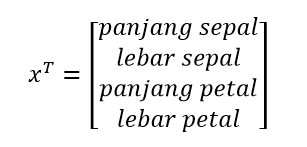

### **Step 2: Standardisasi Data**

Penentuan apakah kita perlu menstandarisasi data sebelum PCA pada  *covariance matrix* tergantung pada skala pengukuran fitur asli. Karena PCA menghasilkan subruang fitur yang memaksimalkan variansi di sepanjang sumbu, akan lebih baik bila standarisasi data dilakukan, terutama jika data berada pada skala yang berbeda. Walaupun seluruh fitur dalam dataset Iris diukur dalam sentimeter, kita tetap akan melakukan transformasi data ke skala satuan (rata-rata = 0 dan variance=1), yang merupakan persyaratan untuk kinerja optimal dari banyak algoritma *machine learning*.

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

### **Step 3: Ambil vektor eigen dan nilai eigen ​​dari covariance matrix atau correlation matrix**

Kovarians antara dua fitur dihitung sebagai berikut:

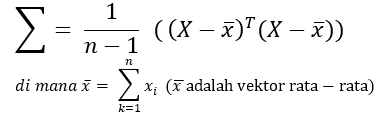

Vektor rata-rata adalah vektor berdimensi **d** di mana setiap nilai dalam vektor mewakili rata-rata sampel kolom fitur dalam dataset.

In [ ]:
import numpy as np

# Menghitung vektor rata-rata
mean_vec = np.mean(X_std, axis=0)

# Menghitung covariance matrix berdasarkan rumus di atas
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec))/(X_std.shape[0]-1)

print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Selain secara manual, Anda juga dapat mengkalkulasi covariance matrix melalui fungsi `cov` yang disediakan oleh `numpy`.

In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Selanjutnya, lakukan dekomposisi eigen pada matriks kovarians

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


### **Step 4: Pilih k komponen utama**

Tujuan dari PCA adalah mengurangi dimensi ruang fitur asli dengan
memproyeksikannya ke subruang yang lebih kecil, di mana vektor eigen akan membentuk sumbu.

Untuk memutuskan vektor eigen mana yang dapat dibuang tanpa kehilangan terlalu banyak informasi, kita perlu memeriksa nilai eigen yang sesuai. Vektor eigen dengan nilai eigen terendah mengandung informasi paling sedikit mengenai sebaran data. Vektor inilah yang dapat dibuang. Pendekatan yang umum dilakukan untuk memilih vektor eigen adalah mengurutkan nilai eigen dari tertinggi ke terendah untuk memilih **k** vektor eigen teratas.

In [ ]:
# Membuat list dari tuple (eigenvalue, eigenvector) 
eig_pairs = [(np. abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Mengurutkan eig_pairs dari nilai eigen tertinggi ke terendah
eig_pairs.sort() 
eig_pairs.reverse() 

Selanjutnya kita akan mencetak nilai eig_pairs untuk memastikan bahwa eig_pairs telah terurut berdasarkan nilai eigen tertinggi ke terendah

In [ ]:
print('Eigenvalues in descending order:') 
for i in eig_pairs: 
 print(i[0])

Eigenvalues in descending order:
2.930353775589317
0.9274036215173428
0.14834222648163967
0.020746013995595967


Setelah mengurutkan pasangan eigen, pertanyaan selanjutnya adalah **"Berapa banyak komponen utama yang akan dipilih untuk subruang fitur baru kita?"** 

Pengukuran yang dapat digunakan adalah ***explained variance*** yang dapat dihitung dari nilai eigen. ***Explained variance*** dapat memberitahu kita berapa banyak informasi (varians) masing-masing komponen utama.

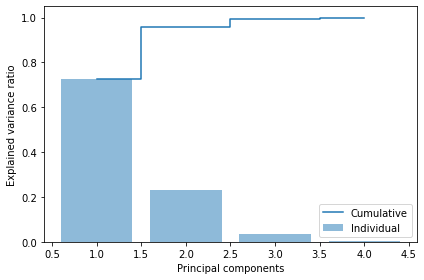

In [ ]:
import matplotlib.pyplot as plt

tot = sum(np.abs(eig_vals)) 
var_exp = [(i / tot) for i in sorted(np.abs(eig_vals), reverse=True)]

cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha=0.5, align='center', label='Individual') 
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid',  label='Cumulative') 
plt.ylabel('Explained variance ratio') 
plt.xlabel('Principal components') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.savefig('./fig-pca-var-exp.png', dpi=300) 
plt.show()

Plot di atas menunjukkan bahwa sebagian besar variansi data (tepatnya 72,77% dari variansi data) dapat dijelaskan oleh komponen utama pertama saja. Komponen utama kedua juga masih mengandung beberapa informasi (23,03%). Sedangkan komponen utama ketiga dan keempat hanya mengandung variansi yang cukup kecil sehingga dapat kita buang tanpa kehilangan banyak informasi. Dapat disimpulkan bahwa dua komponen utama pertama mengandung: 95,8% dari informasi.

### **Step 5: Buat matriks proyeksi W**

Pada dasarnya, Matriks Proyeksi merupakan matriks hasil konkatenasi vektor eigen dari k komponen yang telah dipilih.

Pada tahap sebelumnya, kita mengurangi ruang fitur 4 dimensi menjadi subruang fitur 2 dimensi dengan memilih **2 vektor eigen teratas** yang memiliki nilai eigen tertinggi. Dengan demikian, matriks proyeksi **W** akan ber-ordo **d×k**.

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1))) 
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


### **Step 6: Transformasikan dataset asli X melalui W untuk mendapatkan subruang fitur k-dimensi Y**

Pada tahap terakhir, kita akan menggunakan matriks proyeksi **W** (ordo 4 × 2) untuk mentransformasikan **X** (dataset asli) ke subruang baru **Y** melalui persamaan: **Y = X × W** sehingga **Y** akan berdimensi 150 × 2.

In [ ]:
Y = X_std.dot(matrix_w)

Karena data hasil PCA hanya terdiri atas 2 fitur, kini kita dapat memvisualisasikannya. Berikut adalah dataset hasil PCA

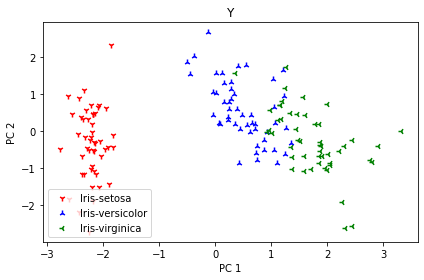

In [ ]:
#Plot the result 
colors = ['r', 'b', 'g'] 
markers = ['1', '2', '3'] 

for l, c, m in zip(np.unique(y), colors, markers): 
 plt.scatter(Y[y==l, 0], 
 Y[y==l, 1], 
 c=c, label=l, marker=m)
 
plt.title('Y') 
plt.xlabel('PC 1') 
plt.ylabel('PC 2') 
plt.legend(loc='lower left') 
plt.tight_layout() 
plt.savefig('./fig-pca-z.png', dpi=300) 
plt.show()


Selamat, Anda telah berhasil mengurangi dimensi fitur X menjadi k komponen melalui tahapan PCA secara manual! Pada bagian berikutnya, kita akan melihat cara penggunaan PCA melalui library yang disediakan oleh `scikit-learn`

## **B. Penerapan PCA dengan Library Scikit Learn**

*Library* `scikit-learn` telah menyediakan modul *decomposition* yang dapat digunakan untuk melakukan PCA. Cara kerja PCA pada *library* ini serupa dengan *step by step* yang telah dilakukan pada bagian sebelumnya.

Kita akan menerapkan PCA dengan `scikit-learn` pada dataset yang sudah dinormalisasi. Mengapa tidak pada dataset asli? Karena PCA dengan `scikit-learn` tidak melakukan tahapan normalisasi dahulu pada data. Oleh karena itu, proses normalisasi harus dilakukan secara terpisah.

Untuk mengetahui pentingnya normalisasi pada dataset yang akan diterapkan PCA, Anda dapat membaca pada tautan berikut:
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html


Pada contoh kali ini, kita akan menggunakan *threshold* pemilihan komponen sebanyak 2.

Dokumentasi lebih lanjut dapat dilihat di https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Selamat mengeksplorasi!

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
skl_pca = pca.fit_transform(X_std)
skl_pca.shape

(150, 2)

Berikut adalah visualisasi hasil penerapan PCA

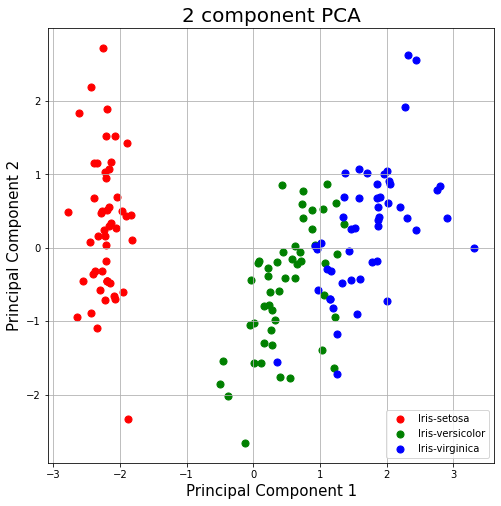

In [ ]:
import matplotlib.pyplot as plt

principalDf = pd.DataFrame(data = skl_pca
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(classes,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(classes)
ax.grid()

# **t-SNE**

*t-Distributed Stochastic Neighbor Embedding* (**t-SNE**) merupakan salah satu teknik reduksi dimensi untuk merepresentasikan dataset berdimensi tinggi dalam ruang berdimensi rendah (dua atau tiga dimensi). Tujuannya adalah agar dataset dapat divisualisasikan.

Perbedaannya dengan PCA adalah teknik pengurangan dimensi linier pada PCA  berusaha untuk memaksimalkan varians dan mempertahankan jarak antar pasangan yang besar. Dengan kata lain, poin-poin yang berbeda berakhir berjauhan. Hal ini menyebabkan visualisasi yang buruk terutama ketika berhadapan dengan struktur manifold non-linear. Sedangkan t-SNE hanya mempertahankan jarak antar pasangan yang kecil atau memiliki kesamaan lokal.

Pada tutorial kali ini, kita akan tetap menggunakan iris dataset yang sudah dinormalisasi. Kemudian, kita akan mendefinisikan model dengan menggunakan kelas TSNE, di sini parameter `n_components` mendefinisikan jumlah dimensi target. Sedangkan `verbose=1` untuk menampilkan log (memudahkan kita apabila ingin mengecek).

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.697519
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.347527
[t-SNE] KL divergence after 1000 iterations: 0.158528


Selanjutnya, kita akan memvisualisasikan hasilnya dalam sebuah plot.

[Text(0.5, 1.0, 'Iris data T-SNE projection')]

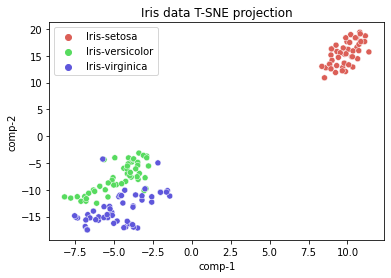

In [ ]:
import seaborn as sns

df_tsne = pd.DataFrame()
df_tsne["y"] = y
df_tsne["comp-1"] = z[:,0]
df_tsne["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df_tsne.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df_tsne).set(title="Iris data T-SNE projection") 